In [1]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import h5py as h5
import tqdm
%matplotlib inline
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from '/home/brad/code/NeuralTDA/neuraltda/simpComp.pyc'>

In [2]:

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*.scg'))


In [6]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)



{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg']}


In [7]:
def JS_vs_beta_pairwise(beta, scg_A, scg_B, d):
    '''
    Compute pairwise divergences between trials 
    for spike trains A and B represented as simplicial complexes
    '''
    divsave = []
    divincsave = []
    diffsave = []
    ntrials1 = len(scg_A)
    ntrials2 = len(scg_B)
    for ind in range(ntrials1):
        for ind2 in range(ntrials2):
            #print(stim1, t1, stim2, t2)
            scgAt = scg_A[ind] #SD
            scgBt = scg_B[ind2] #Targ
            div = sa.compute_JS_expanded(scgAt, scgBt, d, beta)
            divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave

In [ ]:
AllSave = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'
for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise(beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSave[tc] = msdActSave
    
import pickle
with open('B604_1SLSE_pairwise_comparisons_attn_comparison_version2.pkl', 'wb') as out:
    pickle.dump(AllSave, out)
    

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide.scg')


  5%|▌         | 1/20 [00:26<08:18, 26.23s/it]

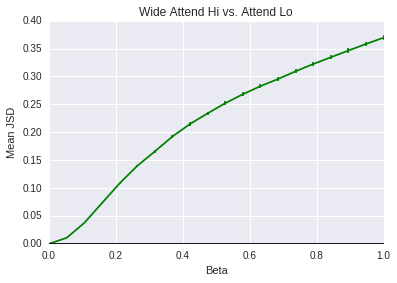

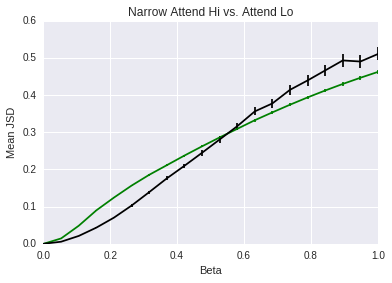

In [22]:
#Wide

cw = np.array(AllSave['SD-correct-wide.scg'])
xw = np.array(AllSave['SD-incorrect-wide.scg'])

cw_mean = np.mean(cw, axis=1)
xw_mean = np.mean(xw, axis=1)

cw_sem = np.std(cw, axis=1) / np.sqrt(np.shape(cw)[1])
xw_sem = np.std(xw, axis=1) / np.sqrt(np.shape(xw)[1])

plt.figure()
plt.errorbar(betas, cw_mean, fmt='g', yerr=cw_sem)
plt.errorbar(betas, xw_mean, fmt='k', yerr=xw_sem)
plt.title('Wide Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')

#Narrow

cn = np.array(AllSave['SD-correct-narrow.scg'])
xn = np.array(AllSave['SD-incorrect-narrow.scg'])

cn_mean = np.mean(cn, axis=1)
xn_mean = np.mean(xn, axis=1)

cn_sem = np.std(cn, axis=1) / np.sqrt(np.shape(cn)[1])
xn_sem = np.std(xn, axis=1) / np.sqrt(np.shape(xn)[1])

plt.figure()
plt.errorbar(betas, cn_mean, fmt='g', yerr=cn_sem)
plt.errorbar(betas, xn_mean, fmt='k', yerr=xn_sem)
plt.title('Narrow Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')